# Datetimes

:::{admonition} Lesson Content
:class: note, dropdown
- Dates
- Datetimes
- Timedeltas
:::

## Context
Dates and times are a common part of working with scientific data.  They are very common fields.  While dates and times are commonly represented as strings, you can also represent them using Python-specific objects that come with added functionality specific to dates and times.

## Python library `datetime`

The `datetime` library has three major components:
1. `date()` - for handling a date (Ex. 2021-06-28)
2. `datetime()` - for handling a specific time of a particular date (Ex. 2021-06-28 at 12:31pm)
3. `timedelta()` - for handling a length of time (Ex. 1 hour, 2 weeks, 3.5 years)

## Dates

In [1]:
from datetime import date

In [2]:
date(2017, 6, 30)

In [3]:
# assigning a date to a variable
birthday = date(2019, 9, 12)

### Why bother?
The dates are nice, but why put in the effort?  Your data by default probably uses a string, for example `2016-06-30`, so why not stick with that?

#### Reason 1
> If Python knows it's a date it can help you find errors.

In [4]:
date(2017, 6, 31)

In [5]:
date(2012,2, 29)

In [6]:
date(2011, 2, 29)

#### Reason 2
> Added organization through quick accessing of elements.

We'll talk about this more below.

### Accessing parts of a date

Once you have a date created you can easily pull out the piece you want.

In [7]:
campaign_start = date(2011, 5, 15)

In [8]:
campaign_start.month

In [9]:
# Monday is 0 and Sunday is 6
campaign_start.weekday()

### Using `dates()` with other objects
You can do what you want with these objects, such as putting them in lists or dictionaries.

In [10]:
holidays = [date(2021, 1, 1), date(2021, 1, 18), date(2021, 11, 25)]
holidays_dict = {
    'New Years Day': date(2021, 1, 1),
    'MLK Day': date(2021, 1, 18),
    'Thanksgiving': date(2021, 11, 25),
}

In [11]:
holidays_dict['Thanksgiving']

### A comment on calendars

Turns out there are actually lots of different calendars that can be used to track time.  The one you are most likely familiar with is the Gregorian calendar (using years, months, and days).  Another common one that you will use is a Julian calendar, which starts on January 1st and counts the days one by one.

If you use model data you will also find more types of calendars, such as `365_day` (just ignores leap days) or `360_day` (every month has 30 days).

<img src="https://imgs.xkcd.com/comics/leap_smearing.png" width=350>


:::{admonition} 📝 Check your understanding
:class: tip

```
holidays_dict = {
    'New Years Day': date(2021, 1, 1),
    'MLK Day': date(2021, 1, 18),
    'Thanksgiving': date(2021, 11, 25),
}
```
What is the output of `holidays_dict['MLK Day'].day`?

:::

## Datetimes

### Creating `datetime()` objects manually

In [12]:
from datetime import datetime

In [13]:
# Created just like `date` objects
datetime(2021, 9, 21, 13, 45, 0)

We have the same ability as with `date()`s to access the different parts of the datetime object.  One place this could come in handy is if we need to narrow down our data by some aspect of the date.

In [14]:
example = datetime(2021, 9, 21, 13, 45, 0)
if example.hour >= 12 and example.hour <= 18:
    print('sample taken in the afternoon')

### A comment on timezones

The `datetime` library also has the ability to keep track and convert timezones.  Timezones can cause a lot of chaos in the data world.  We aren't going to talk about them in depth but know that if you need to track timezones for whatever reason `datetime` can handle that.

## Creating `date()`s and `datetime()`s from strings

Thus far we have created our time objects by inputing the integer number of the year, month, etc.  Much more commonly, though, you aren't creating them from scratch, you are creating them from a string.  For that we have `strptime` and `strftime`.

| Syntax      | Description |
| :-----------: | :-----------: |
| `datetime.strptime()`      | Convert from string to datetime       |
| `DATETIME_OBJECT.strftime()`   | Convert from datetime to string       |

All of the following strings can be converted programatically into datetime objects:
* `'2019-01-29'`
* `'01-31-88'`
* `'September 12 7:00PM'`
* `'Apr 11 2001 13:00:00'`
* `'210 9:00'`
* And so many other combinations

The key part of converting from string to datetime and vice versa is that we need to tell the computer what is supposed to be looking for in the string.  For that we have labels, or directives, such as `%Y` or `%d`.  The place to consult for format strings is [strftime.org](https://strftime.org/).

### Some Examples

#### Example 1

In [15]:
date_string = '2019-01-29'

#### Example 2

In [16]:
date_string = 'Apr 11 2001 13:00:00'

#### Example 3

_Switching date formats_

In [17]:
start_date_string = '2016234'

In [18]:
# Goal: '2016-08-21 00:00:00'

:::{admonition} 📝 Check your understanding
:class: tip

What is the format string corresponding to the following datetime string?

`'8/30/2019 22:13:00'`, which shows the date August 30th 2019 at 10:13PM (military time).

:::

## `timedelta()` objects

While `date()`sand `datetime()`s represent a specific moment in time, `timedelta()`s represent a length of time, for example, one week, two hours, or 15 seconds.  They aren't connected to any particular moment, they just represent a set length of time.

In [19]:
from datetime import timedelta

In [20]:
# Representing 3 days
timedelta(days=3)

In [21]:
date.today() + timedelta(days=3)

In [22]:
# Negatives also work
date.today() + timedelta(days=-3)

When we combine `timedelta()`s and `datetime()`s what we get is the ability to really quickly determine how long there is between two things.

In [23]:
# Combine lengths of time
datetime.now() + timedelta(days=3, hours=1)

In [24]:
# If you want to find the difference between two lengths of time
date.today() - date(2021, 11, 25)

:::{admonition} 📝 Check your understanding
:class: tip

How many days are there between today and Thanksgiving of this year (November 25th 2021)?

:::

### NAAMES Julian Day Datetime example

Also point out Julian Day converters online as a check http://www.longpelaexpertise.com/toolsJulian.php 

In [21]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Import example data - flight from NAAMES campaign
naames = pd.read_csv('data/naames-mrg01-c130_merge_20151112_R5_thru20151123.csv', skiprows=223)
# Filter down to just 1 day
naames = naames[naames[' Fractional_Day'] < 317]
# Remove NaN values
naames = naames.replace({-999999: np.nan})

In [13]:
x = naames[' Fractional_Day']

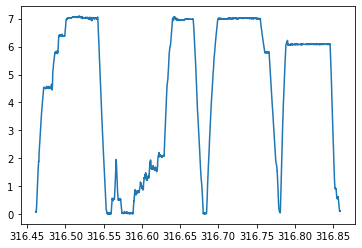

In [14]:
plt.plot(x, naames[' ALTP'])

In [31]:
# Notice that if you don't specify a year it defaults to 1900
dt = datetime.strptime('2015316', '%Y%j')
print(dt)

2015-11-12 00:00:00


In [34]:
x

0        316.46124
1        316.46125
2        316.46126
3        316.46127
4        316.46128
           ...    
34394    316.85932
34395    316.85933
34396    316.85934
34397    316.85935
34398    316.85936
Name:  Fractional_Day, Length: 34399, dtype: float64

In [41]:
# This could be a good group worktime project. Come up with this line of code.
pd.to_datetime('2014-12-31') + pd.to_timedelta(x, unit='D')

0       2015-11-12 11:04:11.136
1       2015-11-12 11:04:12.000
2       2015-11-12 11:04:12.864
3       2015-11-12 11:04:13.728
4       2015-11-12 11:04:14.592
                  ...          
34394   2015-11-12 20:37:25.248
34395   2015-11-12 20:37:26.112
34396   2015-11-12 20:37:26.976
34397   2015-11-12 20:37:27.840
34398   2015-11-12 20:37:28.704
Name:  Fractional_Day, Length: 34399, dtype: datetime64[ns]

In [42]:
# Practice problem error - thinking about types
'2015' + naames[ 'Fractional_Day']

KeyError: 'Fractional_Day'